Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Part I: Clean Data

Import data

In [2]:
df1 = pd.read_csv("/Users/halabanz/Desktop/tds_analysis/df.csv")
df1.head()

,Tags,Text,Title,Url,Subtitle,Name,Upvotes,Date,Comments,Read
0,"['/tagged/programming', '/tagged/python', '/ta...","['Python haters always say, that one of the re...",Making Python Programs Blazingly Fast,https://towardsdatascience.com/making-python-p...,Lets look at the performance of our Python pro...,Martin Heinz,3.3K,2020-01-01T20:15:03.352Z,4 responses,5 min read
1,"['/tagged/programming', '/tagged/technology', ...",['Languages change. Languages adapt. Python 2 ...,6 New Features in Python 3.8 for Python Newbies,https://towardsdatascience.com/6-new-features-...,Prepare yourself as,Eden Au,1.7K,2020-01-01T23:27:59.289Z,4 responses,4 min read
2,"['/tagged/python', '/tagged/data-science', '/t...","['Python is cool. Really cool. However, a lot ...",How to be fancy with Python,https://towardsdatascience.com/how-to-be-fancy...,Python tricks that will make your life easier,Dipam Vasani,1.7K,2020-01-01T14:26:52.211Z,12 responses,5 min read
3,"['/tagged/machine-learning', '/tagged/tensorfl...",['Convolutional neural networks (CNN) work gre...,Understanding and implementing a fully convolu...,https://towardsdatascience.com/implementing-a-...,"A tutorial on building, training and",Himanshu Rawlani,271,2020-01-01T16:01:59.680Z,1 response,10 min read
4,"['/tagged/machine-learning', '/tagged/privacy'...",['Data privacy has been called “the most impor...,Perfectly Privacy-Preserving AI,https://towardsdatascience.com/perfectly-priva...,What is it and how do we achieve it?,Patricia Thaine,206,2020-01-01T23:46:51.168Z,1 response,10 min read


In [3]:
print(len(df1),'total articles')

11579 total articles


Check for missing values

In [4]:
df1.isna().sum()

Tags           0
Text           0
Title          5
Url            0
Subtitle    1995
Name           0
Upvotes      202
Date           0
Comments    7324
Read           0
dtype: int64

Impute missing values

In [5]:
# Replace missing titles with url
def url_to_title(url):
    '''Find title from url'''

    url = url.replace('https://towardsdatascience.com/', '')
    url = re.sub(r'.*/', '', url)
    url = re.sub(r'([A-Za-z]+[\d@]+[\w@]*|[\d@]+[A-Za-z]+[\w@]*).+', '', url)
    title = url.replace('-', ' ')

    return title

null_urls = (list(df1.loc[df1.Title.isnull(), 'Url']))

null_titles = []
for url in null_urls:
    null_titles.append(url_to_title(url))

df1.loc[df1.Title.isnull(), 'Title'] = null_titles

# Impute missing Subtitles with blank
df1['Subtitle'] = df1['Subtitle'].replace(np.nan,'', regex=True)

# Impute missing Upvotes and Comments with 0  
df1 = df1.replace(np.nan, '0', regex=True)
df1.isna().sum()

Tags        0
Text        0
Title       0
Url         0
Subtitle    0
Name        0
Upvotes     0
Date        0
Comments    0
Read        0
dtype: int64

Remove text from Comments, Read, and Upvotes columns, then convert to int

In [6]:
# Comments
df1['Comments'] = df1['Comments'].str.split(' ').str[0]
df1['Comments'] = df1['Comments'].astype(int)

# Read
df1['Read'] = df1['Read'].str.split(' m').str[0]
df1['Read'] = df1['Read'].astype(int)

# Upvotes
df1.Upvotes = df1.Upvotes.astype('object')
def str_to_float(feature):
    '''Change string with K or M to a float (.i.e, 5k)'''
    
    feature = feature.replace(r'[KM]+$', '', regex=True).astype(float) * \
    feature.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int)
    
    return feature
df1['Upvotes'] = str_to_float(df1['Upvotes'])

Clean 'Tags' Column, i.e. remove '/tagged'

In [7]:
# get rid of brackets 
df1['Tags'] = df1['Tags'].map(lambda x: x.lstrip("[").rstrip("]"))
# convert string to list in order to clean each individual tag
df1['Tags'] = df1["Tags"].str.split(", ")
# get rid of '/tagged
df1['Tags'] = [[j[9:] for j in i] for i in df1['Tags']]
# get rid of ' at the end
df1['Tags'] = [[j.rstrip("'") for j in i] for i in df1['Tags']]

Change Title, Subtitle, and Text to lowercase for consistency

In [8]:
df1['Title'] = df1['Title'].str.lower()
df1['Subtitle'] = df1['Subtitle'].str.lower()
df1['Text'] = df1['Text'].str.lower()

In [9]:
df1.head()

,Tags,Text,Title,Url,Subtitle,Name,Upvotes,Date,Comments,Read
0,"[programming, python, software-engineering, da...","['python haters always say, that one of the re...",making python programs blazingly fast,https://towardsdatascience.com/making-python-p...,lets look at the performance of our python pro...,Martin Heinz,3300.0,2020-01-01T20:15:03.352Z,4,5
1,"[programming, technology, coding, python, data]",['languages change. languages adapt. python 2 ...,6 new features in python 3.8 for python newbies,https://towardsdatascience.com/6-new-features-...,prepare yourself as,Eden Au,1700.0,2020-01-01T23:27:59.289Z,4,4
2,"[python, data-science, programming, coding]","['python is cool. really cool. however, a lot ...",how to be fancy with python,https://towardsdatascience.com/how-to-be-fancy...,python tricks that will make your life easier,Dipam Vasani,1700.0,2020-01-01T14:26:52.211Z,12,5
3,"[machine-learning, tensorflow, fully-convoluti...",['convolutional neural networks (cnn) work gre...,understanding and implementing a fully convolu...,https://towardsdatascience.com/implementing-a-...,"a tutorial on building, training and",Himanshu Rawlani,271.0,2020-01-01T16:01:59.680Z,1,10
4,"[machine-learning, privacy, cryptography, arti...",['data privacy has been called “the most impor...,perfectly privacy-preserving ai,https://towardsdatascience.com/perfectly-priva...,what is it and how do we achieve it?,Patricia Thaine,206.0,2020-01-01T23:46:51.168Z,1,10


# Part II: Analysis

Find language tags across all articles

In [10]:
# This function pulls tags from each article
def extract_tags(df):
    df['Tags'] = df['Tags'].map(lambda x: x.lstrip('[').rstrip(']'))
    df['Tags'] = df["Tags"].str.split(", ")
    
    tags = []
    col_one_list = df['Tags'].tolist()
    for i in col_one_list:
        for j in i:
            tags.append(j)
            
    # How many times does a tag appear when tag, title, or subtitle includes python (Python)
    tag_count = {x: round((tags.count(x)/len(df))*100,2) for x in tags}  
    # sorted by most common tags
    sorted_tag_count = sorted(tag_count.items(), reverse = True, key=lambda kv: kv[1])
    return sorted_tag_count

# dont want to overwrite original
df2 = df1.copy()
# convert tag from list to string
df2['Tags'] = df2['Tags'].astype(str)
# examine all tags
all_tags = extract_tags(df2)
for i in all_tags:
    print(i)

("'data-science'", 59.12)
("'machine-learning'", 44.22)
("'python'", 23.23)
("'artificial-intelligence'", 21.41)
("'programming'", 18.87)
("'deep-learning'", 12.21)
("'towards-data-science'", 11.62)
("'technology'", 9.32)
("'data-visualization'", 7.0)
("'data'", 6.17)
("'statistics'", 6.03)
("'data-analysis'", 4.8)
("'ai'", 4.47)
("'nlp'", 4.46)
("'covid-19'", 3.57)
("'analytics'", 3.39)
("'software-development'", 3.37)
("'neural-networks'", 3.29)
("'computer-vision'", 3.13)
("'mathematics'", 2.71)
("'tensorflow'", 2.19)
("'pandas'", 2.06)
("'education'", 1.93)
("'big-data'", 1.87)
("'science'", 1.87)
("'coronavirus'", 1.81)
("'business'", 1.8)
("'software-engineering'", 1.65)
("'visualization'", 1.64)
("'reinforcement-learning'", 1.57)
("'r'", 1.56)
("'coding'", 1.51)
("'aws'", 1.45)
("'algorithms'", 1.44)
("'computer-science'", 1.43)
("'data-engineering'", 1.43)
("'sql'", 1.43)
("'classification'", 1.38)
("'finance'", 1.35)
("'pytorch'", 1.3)
("'editors-pick'", 1.28)
("'naturallangua

("'suicide-prevention'", 0.01)
("'web-scrapers'", 0.01)
("'odbc'", 0.01)
("'sctransform'", 0.01)
("'seurat'", 0.01)
("'gene-expression'", 0.01)
("'google-photos'", 0.01)
("'bodypix'", 0.01)
("'building-energy-modeling'", 0.01)
("'data-profiling'", 0.01)
("'geotag'", 0.01)
("'ghana'", 0.01)
("'data-storage'", 0.01)
("'conjoint-analysis'", 0.01)
("'carbon-emissions'", 0.01)
("'customer-stories'", 0.01)
("'public-cloud'", 0.01)
("'yoga'", 0.01)
("'new-years-resolutions'", 0.01)
("'inferential-statistics'", 0.01)
("'raspbian'", 0.01)
("'ds-project-management'", 0.01)
("'service-mesh'", 0.01)
("'istio'", 0.01)
("'cmip6'", 0.01)
("'randomness'", 0.01)
("'transport'", 0.01)
("'digital-divide'", 0.01)
("'jupyter-notebook-markdown'", 0.01)
("'jupyter-notebook-latex'", 0.01)
("'jupyter-notebook-printout'", 0.01)
("'multiple-time-series'", 0.01)
("'wavelet-transformation'", 0.01)
("'social-entrepreneurship'", 0.01)
("'big-data-testing'", 0.01)
("'convlstm2d'", 0.01)
("'traffic-safety'", 0.01)
("'

("'ｍedium'", 0.01)
("'formula'", 0.01)
("'mathml'", 0.01)
("'mindset'", 0.01)
("'gtp-3'", 0.01)
("'google-bigquery'", 0.01)
("'visualizing-data'", 0.01)
("'rolling-average'", 0.01)
("'grab'", 0.01)
("'feedforward-net'", 0.01)
("'object-relational-mapping'", 0.01)
("'query-builder'", 0.01)
("'catalog'", 0.01)
("'apple-mac'", 0.01)
("'aimedicalimaging'", 0.01)
("'data-integration'", 0.01)
("'uncertainty-analysis'", 0.01)
("'teachable-machine'", 0.01)
("'route-optimisation'", 0.01)
("'multi-objective'", 0.01)
("'vehicle-routing-problem'", 0.01)
("'feedback'", 0.01)
("'data-cleansing'", 0.01)
("'business-forecasting'", 0.01)
("'strategic-planning'", 0.01)
("'random'", 0.01)
("'digital-ethic'", 0.01)
("'elasticsearch-in-gcp'", 0.01)
("'mean'", 0.01)
("'monthly-report'", 0.01)
("'hash-table'", 0.01)
("'ge2020'", 0.01)
("'olympics'", 0.01)
("'search-engine-optimizati'", 0.01)
("'social-listening'", 0.01)
("'multi-model'", 0.01)
("'product-recommendations'", 0.01)
("'transformer'", 0.01)
("'pa

Map synonymous tags to their canonical names (i.e. "python-programming" → "python")

In [11]:
df1['Tags'] = [['artificial-intelligence' if j == 'ai' else 'covid-19' if j == 'coronavirus' else 'covid-19' if j == 'covid19' else 'data-visualization' if j == 'visualization' else 'data-visualization' if j == 'data-visualisation' else 'postgres' if j == 'postgresql' else 'data-analysis' if j == 'analytics' else 'shiny' if j == 'r-shiny' else 'statistics' if j == 'rstats' else 'data-analysis' if j == 'data-analytics' else 'statistics' if j == 'bayesian-statistics' else 'regression' if j == 'linear-regression' else 'regression' if j == 'logistic-regression' else 'r' if j == 'r-programming' else 'r' if j == 'r-language' else 'python' if j == 'python-programming' else 'python' if j == 'python3' else 'spark' if j == 'apache-spark' else 'spark' if j == 'spark-sql' else 'postgres' if j == 'postgis' else 'nlp' if j == 'naturallanguageprocessing' else 'tensorflow' if j == 'tensorflowjs' else 'julia' if j == 'julialang' else 'programming' if j == 'programming-languages' else 'coding' if j == 'code' else 'scikit-learn' if j == 'sklearn' else 'mathematics' if j == 'math' else 'machine-learning' if j == 'machine-leanring' else 'r' if j == 'r-markdown' else 'r' if j == 'rstudio' else 'a-b-testing' if j == 'ab-test' else 'a-b-testing' if j == 'ab-testing' else 'regression' if j == 'regression-analysis' else 'causal-inference' if j == 'causality' else 'statistics' if j == 'stats' else 'statistics' if j == 'statistical-analysis' else 'neural-networks' if j == 'neural-network' else 'neural-networks' if j == 'convolutional-neural-net' else 'neural-networks' if j == 'recurrent-neural-network' else 'neural-networks' if j == 'convolution-neural-net' else 'neural-networks' if j == 'graph-neural-networks' else 'computer-vision' if j == 'computer-v' else 'computer-vision' if j == 'image-processing' else 'computer-vision' if j == 'image-classification' else 'exploratory-data-analysis' if j == 'eda' else 'deployment' if j == 'ml-model-deployment' else 'deployment' if j == 'deploy' else 'deployment' if j == 'deployment-model' else j for j in i] for i in df1['Tags']] # image processing -> computer vision
df1['Tags'] = df1['Tags'].astype(str)  # convert form list to string

Check each article to see whether any of its tags/title/subtitle include a given language

In [12]:
def filter_posts_by_lang(df,title_keywords,tag_keywords,lang):
    title = df[df['Title'].str.contains(title_keywords, na=False)]
    subtitle = df[df['Subtitle'].str.contains(title_keywords, na=False)]
    tags = df[df['Tags'].str.contains(tag_keywords, na=False)]
    df_lang = pd.concat([title,subtitle,tags])
    df_lang['Language'] = lang # create new col for language name
    df_lang = df_lang.drop_duplicates() # article may contain 'python' in tag and title/subtitle
    return df_lang

In [13]:
# Create set of dataframes for different languages
df_python = filter_posts_by_lang(df1,"python","'python'","Python")
df_r = filter_posts_by_lang(df1," r ","'r'","R")
df_sql = filter_posts_by_lang(df1,"sql","'sql'|'sql-server'|'postgres'|'mysql'|'oracle'","SQL")  
df_spark = filter_posts_by_lang(df1," spark |apache spark","'spark'","Spark")
df_js = filter_posts_by_lang(df1,"javascript","'javascript'","JavaScript")  

df_python.head()

,Tags,Text,Title,Url,Subtitle,Name,Upvotes,Date,Comments,Read,Language
0,"['programming', 'python', 'software-engineerin...","['python haters always say, that one of the re...",making python programs blazingly fast,https://towardsdatascience.com/making-python-p...,lets look at the performance of our python pro...,Martin Heinz,3300.0,2020-01-01T20:15:03.352Z,4,5,Python
1,"['programming', 'technology', 'coding', 'pytho...",['languages change. languages adapt. python 2 ...,6 new features in python 3.8 for python newbies,https://towardsdatascience.com/6-new-features-...,prepare yourself as,Eden Au,1700.0,2020-01-01T23:27:59.289Z,4,4,Python
2,"['python', 'data-science', 'programming', 'cod...","['python is cool. really cool. however, a lot ...",how to be fancy with python,https://towardsdatascience.com/how-to-be-fancy...,python tricks that will make your life easier,Dipam Vasani,1700.0,2020-01-01T14:26:52.211Z,12,5,Python
6,"['machine-learning', 'decision-tree-classifier...",['decisions trees is a powerful group of super...,an introduction to decision trees with python ...,https://towardsdatascience.com/an-introduction...,a complete guide to getting an intuitive under...,Mikkel Duif,104.0,2020-01-01T19:51:19.558Z,1,8,Python
35,"['python', 'data-visualization', 'computer-pro...",['venn diagrams are great for illustrating the...,how to create and customize venn diagrams in p...,https://towardsdatascience.com/how-to-create-a...,customize venn diagrams with 2 groups or 3 groups,Julia Kho,88.0,2020-01-02T19:00:58.892Z,2,4,Python


Plot frequency of articles within each set of languages

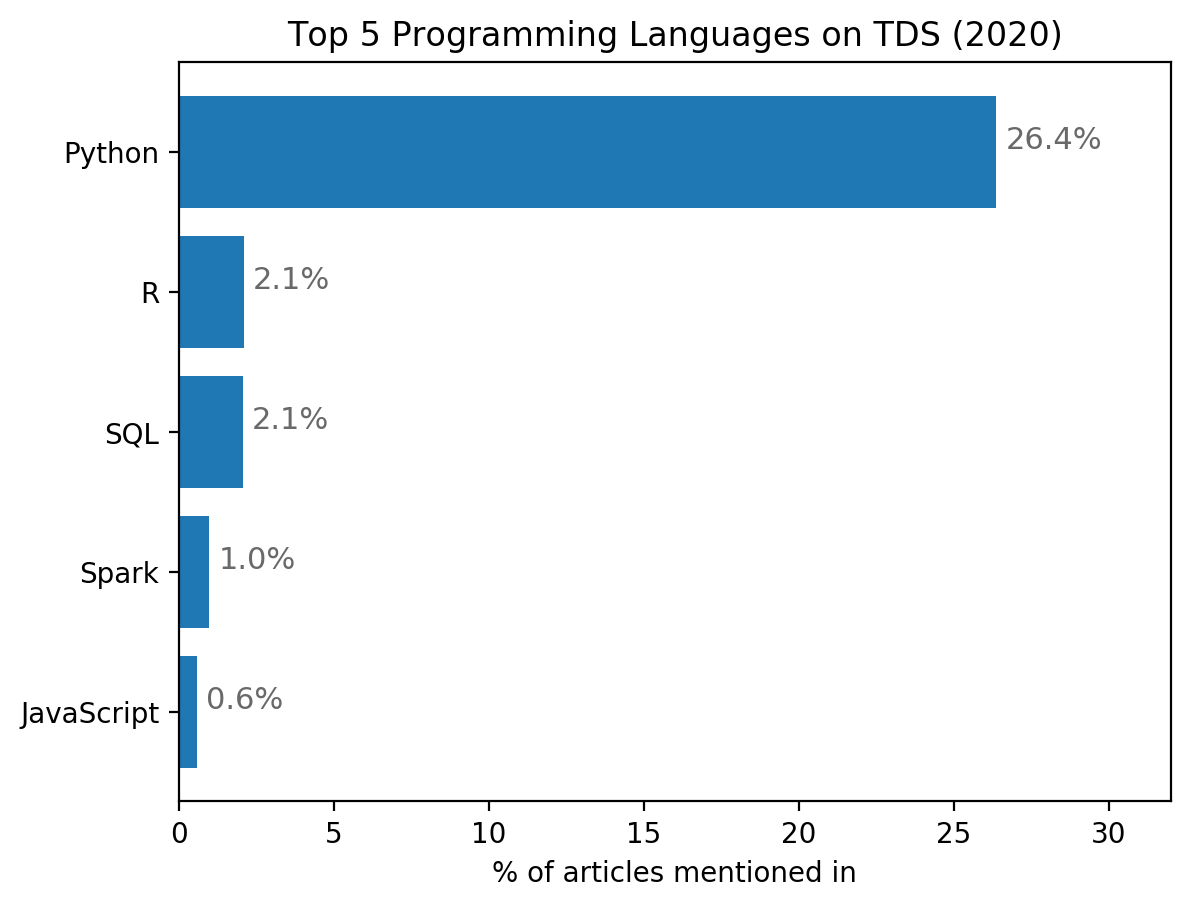

In [14]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

x = ['Python','R','SQL','Spark','JavaScript']  
freq = [(len(df_python)/len(df1))*100,(len(df_r)/len(df1))*100,(len(df_sql)/len(df1))*100,(len(df_spark)/len(df1))*100,(len(df_js)/len(df1))*100] # ,(len(df_scala)/len(df1))*100,(len(df_scala)/len(df1))*100,(len(df_matlab)/len(df1))*100

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(x, freq, align='center')
ax.set_yticks(x)
ax.set_xlim([0,32])
ax.set_yticklabels(x)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% of articles mentioned in')
ax.set_title('Top 5 Programming Languages on TDS (2020)')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/100)*100, 1))+'%', fontsize=11,
color='dimgrey')
    
plt.show()

Let's examine the most common tags within each language

In [15]:
langs = [df_python,df_r,df_sql,df_spark,df_js] 

lang_tags = []
for i in langs:
    tags = extract_tags(i)
    word_freq_df = pd.DataFrame(tags, columns = ['Tag','Percent'])
    word_freq_df['Tag'] = word_freq_df['Tag'].str.strip("'")
    if i.equals(df_python):
        word_freq_df['Language'] = "Python"
        unwanted_tags = ['python','data-science','data','towards-data-science','programming','science','technology','coding']
    elif i.equals(df_r):
        word_freq_df['Language'] = "R"
        unwanted_tags = ['r','data-science','data','towards-data-science','programming','science','technology','coding']
    elif i.equals(df_sql):
        word_freq_df['Language'] = "SQL"
        unwanted_tags = ['sql','data-science','data','towards-data-science','programming','science','technology','coding']
    elif i.equals(df_spark):
        word_freq_df['Language'] = "Spark"
        unwanted_tags = ['spark','data-science','data','towards-data-science','programming','science','technology','coding']
    elif i.equals(df_js):
        word_freq_df['Language'] = "JavaScript" 
        unwanted_tags = ['javascript','data-science','data','towards-data-science','programming','science','technology','coding']
 
    word_freq_filtered_df = word_freq_df[~word_freq_df.Tag.isin(unwanted_tags)]
    word_freq_df_sub =  word_freq_filtered_df[0:10] # get top 10 tags per language
    lang_tags.append(word_freq_df_sub)
    
df_tag_freq = pd.concat(lang_tags)
df_tag_freq['Percent'] = df_tag_freq['Percent'].astype(int)

df_tag_freq.head()

,Tag,Percent,Language
3,machine-learning,34,Python
4,artificial-intelligence,13,Python
5,data-visualization,11,Python
7,data-analysis,8,Python
9,software-development,5,Python


In [16]:
# # Export so data can be visualized in Tableau
# df_tag_freq.to_csv("/Users/halabanz/Desktop/tds_analysis/tag_freq_top10.csv", index = None, header = True)

Examine tags within each set of language articles (i.e. why is ML so popular in Python related articles)

In [17]:
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS 
import math
# nltk.download('stopwords')

In [18]:
def filter_lang_posts_by_tags(df,title_keywords,tag_keywords,lang,tag):
    
    # repeat previous function
    lang_df = filter_posts_by_lang(df,title_keywords,tag_keywords,lang)
    
    # convert from list to string
    lang_df['Tags'] = lang_df['Tags'].astype(str)
    
    # find specific tag within each language related posts
    lang_df = lang_df[lang_df['Tags'].str.contains(tag, na=False)]
    return lang_df

def process_text(text, stopwords_update): 
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(stopwords_update)

    # tokenize
    tokens = word_tokenize(text)
    new_text = [i for i in tokens if not i in stop_words]

    new_text = ' '.join(new_text)

    return new_text


def make_wordcloud(new_text):
    ''''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='black', max_words=10,
                min_font_size = 5, collocations=True,  
                random_state = 1,colormap='Set2').generate(new_text) 

    fig = plt.figure(figsize = (7, 7), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    
    return fig

# Python

/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


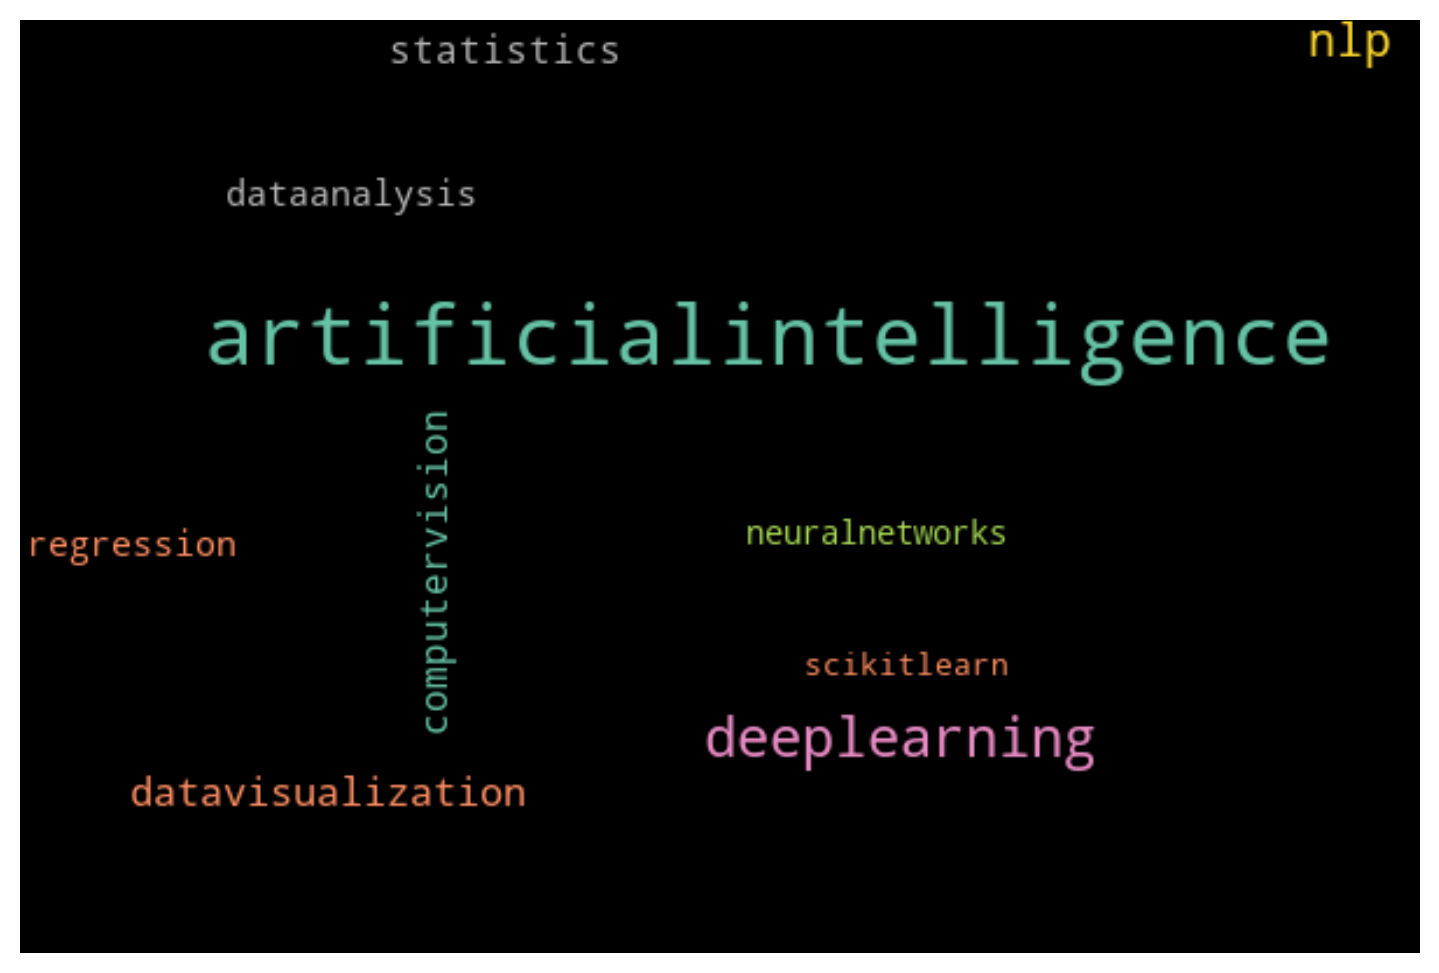

In [19]:
# Search top 10 tags appearing alongside ML tags
df_python_ml = filter_lang_posts_by_tags(df1,"python","'python'","Python","'machine-learning'")
tag = df_python_ml.apply(lambda row: process_text(row.Tags, ['python','datascience','data','towardsdatascience','programming','science','technology','machinelearning']), axis=1) 
combine_tags_python = ' '.join(tag) 
cloud = make_wordcloud(combine_tags_python)
cloud.show()

In [20]:
cnt = 0
for i in df_python_ml['Tags']:
    if "'artificial-intelligence'" in i or "'deep-learning'" in i or "'nlp'" in i:
        cnt += 1
print("AI, DL, and NLP appeared in", round((cnt/len(df_python_ml)*100),0), "percent of ML tagged articles")

AI, DL, and NLP appeared in 41.0 percent of ML tagged articles


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


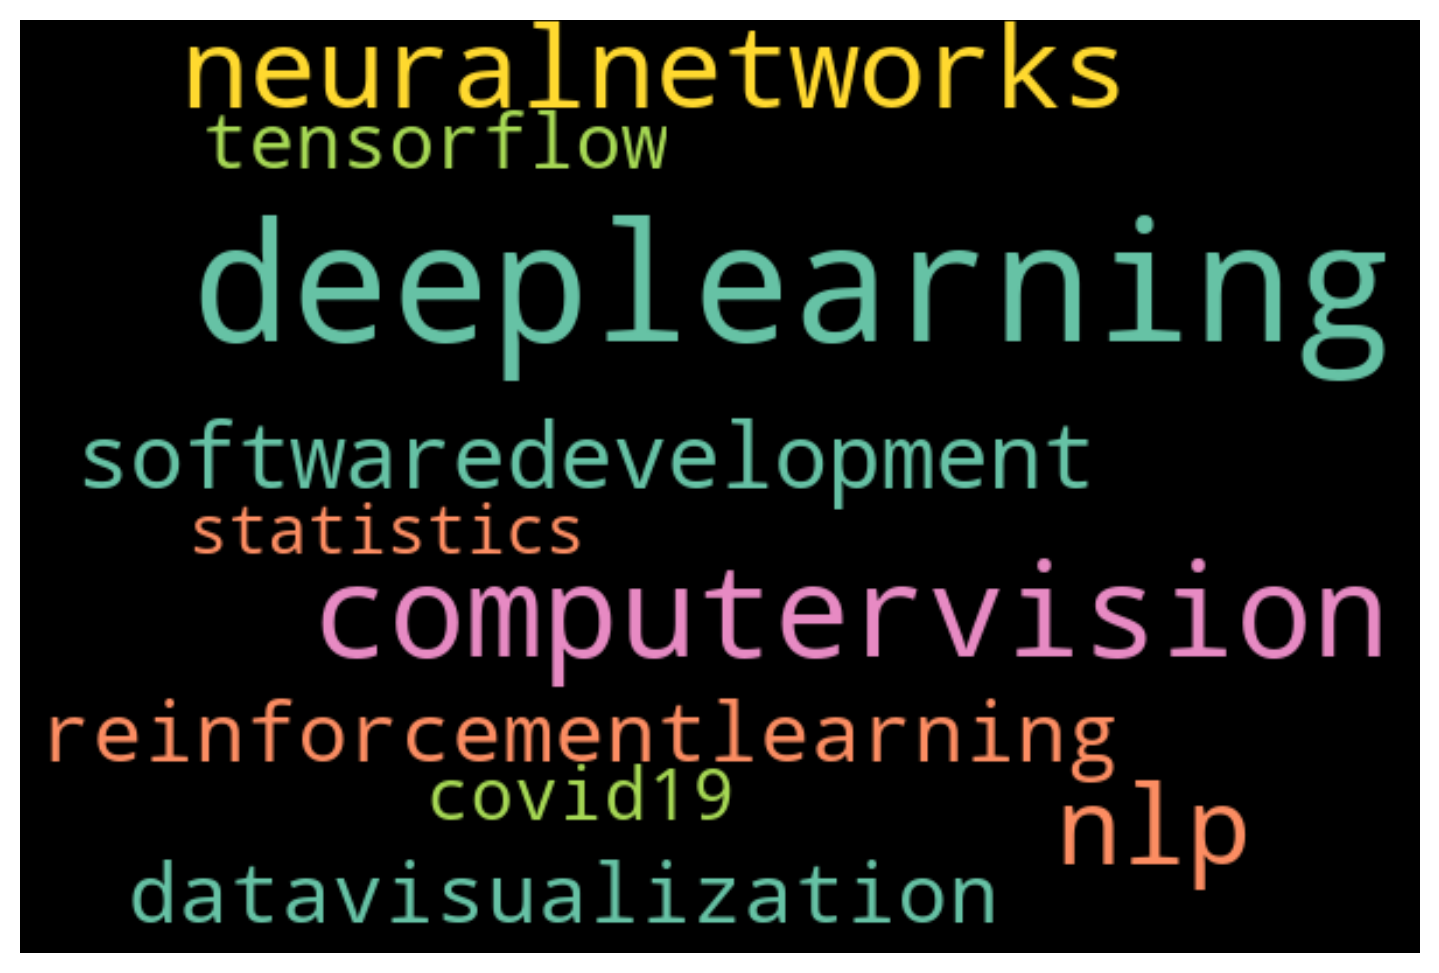

In [21]:
# Search top 10 tags appearing alongside AI tags (excluding ML)
df_python_ai = filter_lang_posts_by_tags(df1,"python","'python'","Python","'artificial-intelligence'")
tag = df_python_ai.apply(lambda row: process_text(row.Tags, ['python','datascience','data','towardsdatascience','programming','science','coding','technology','artificialintelligence','machinelearning']), axis=1)  
combine_tags_python = ' '.join(tag) 
cloud = make_wordcloud(combine_tags_python)
cloud.show()

In [22]:
cnt = 0
for i in df_python_ai['Tags']:
    if "'computer-vision'" in i or "'neural-networks'" in i:
        cnt += 1
print("Computer Vision and NN appeared in", round((cnt/len(df_python_ai)*100),0), "percent of AI tagged articles")

Computer Vision and NN appeared in 10.0 percent of AI tagged articles


In [23]:
cnt = 0
for i in df_python_ai['Tags']:
    if "'tensorflow'" in i or "'pytorch'" in i or "'keras'" in i:
        cnt += 1
print("tensorflow appeared in", round((cnt/len(df_python_ai)*100),0), "percent of AI tagged articles")

tensorflow appeared in 4.0 percent of AI tagged articles


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


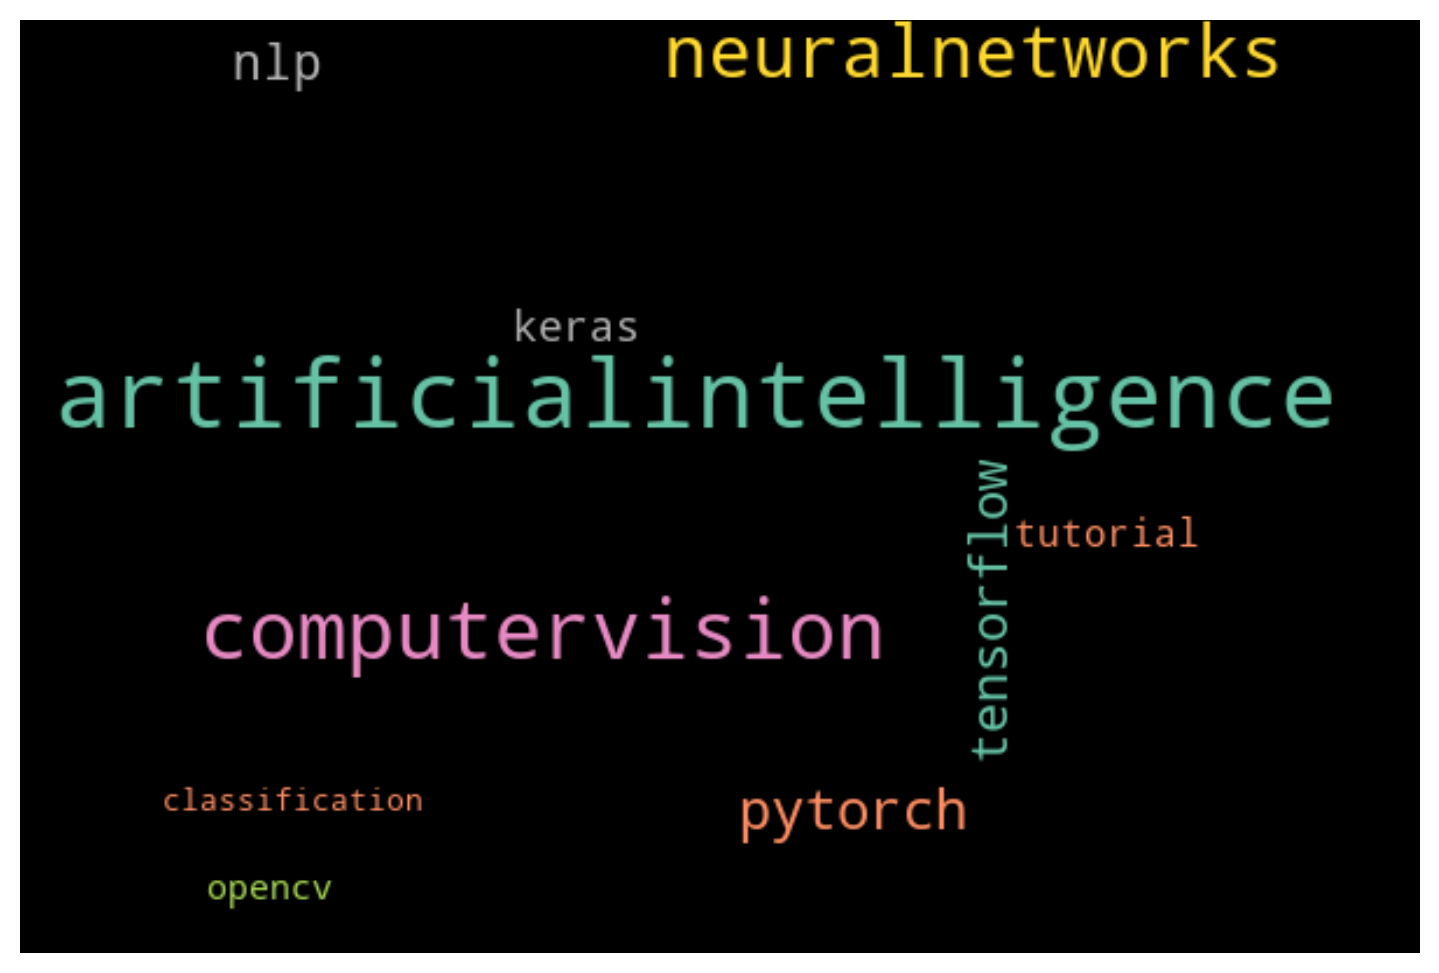

In [24]:
# Search top 10 tags appearing alongside DL tags (excluding ML)
df_python_dl = filter_lang_posts_by_tags(df1,"python","'python'","Python","'deep-learning'")
tag = df_python_dl.apply(lambda row: process_text(row.Tags, ['python','datascience','data','towardsdatascience','programming','science','technology','deeplearning','machinelearning']), axis=1)  
combine_tags_python = ' '.join(tag)  
cloud = make_wordcloud(combine_tags_python)
cloud.show()

In [25]:
cnt = 0
for i in df_python_dl['Tags']:
    if "'computer-vision'" in i or "'neural-networks'" in i:
        cnt += 1
print("Computer Vision and NN appeared in", round((cnt/len(df_python_dl)*100),0), "percent of DL tagged articles")

Computer Vision and NN appeared in 33.0 percent of DL tagged articles


In [26]:
cnt = 0
for i in df_python_dl['Tags']:
    if "'tensorflow'" in i or "'pytorch'" in i or "'keras'" in i or "'opencv'" in i:
        cnt += 1
print("tensorflow, pytorch, keras, and opencv appeared in", round((cnt/len(df_python_dl)*100),0), "percent of DL tagged articles")

tensorflow, pytorch, keras, and opencv appeared in 22.0 percent of DL tagged articles


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


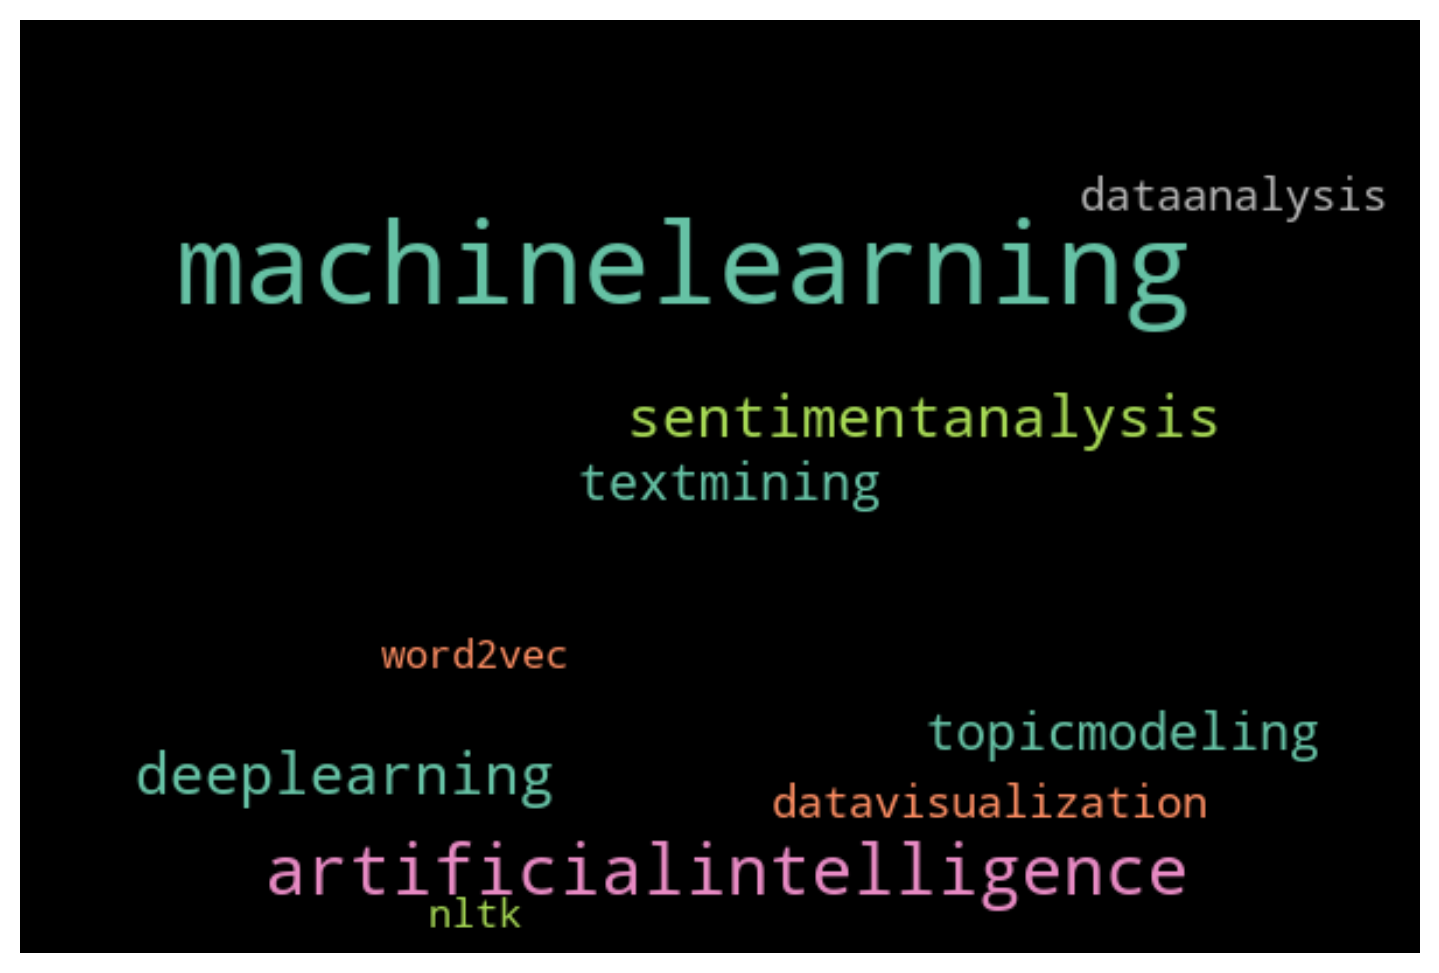

In [27]:
# Search top 10 tags appearing alongside NLP tags (excluding ML)
df_python_nlp = filter_lang_posts_by_tags(df1,"python","'python'","Python","'nlp'")
tag = df_python_nlp.apply(lambda row: process_text(row.Tags, ['python','datascience','data','towardsdatascience','programming','science','technology','nlp']), axis=1)  
combine_tags_python = ' '.join(tag)  
cloud = make_wordcloud(combine_tags_python)
cloud.show()

In [28]:
cnt = 0
for i in df_python_nlp['Tags']:
    if "'sentiment-analysis'" in i or "'text-mining'" in i or "'topic-modeling'" in i or "'word2vec'" in i:
        cnt += 1
print("sentiment analysis, text mining, and topic modeling appeared in", round((cnt/len(df_python_nlp)*100),0), "percent of NLP tagged articles")

sentiment analysis, text mining, and topic modeling appeared in 20.0 percent of NLP tagged articles


In [29]:
cnt = 0
for i in df_python_nlp['Tags']:
    if "'spacy'" in i or "'nltk'" in i:
        cnt += 1
print("nltk and spacy appeared in", round((cnt/len(df_python_nlp)*100),0), "percent of NLP tagged articles")

nltk and spacy appeared in 6.0 percent of NLP tagged articles


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


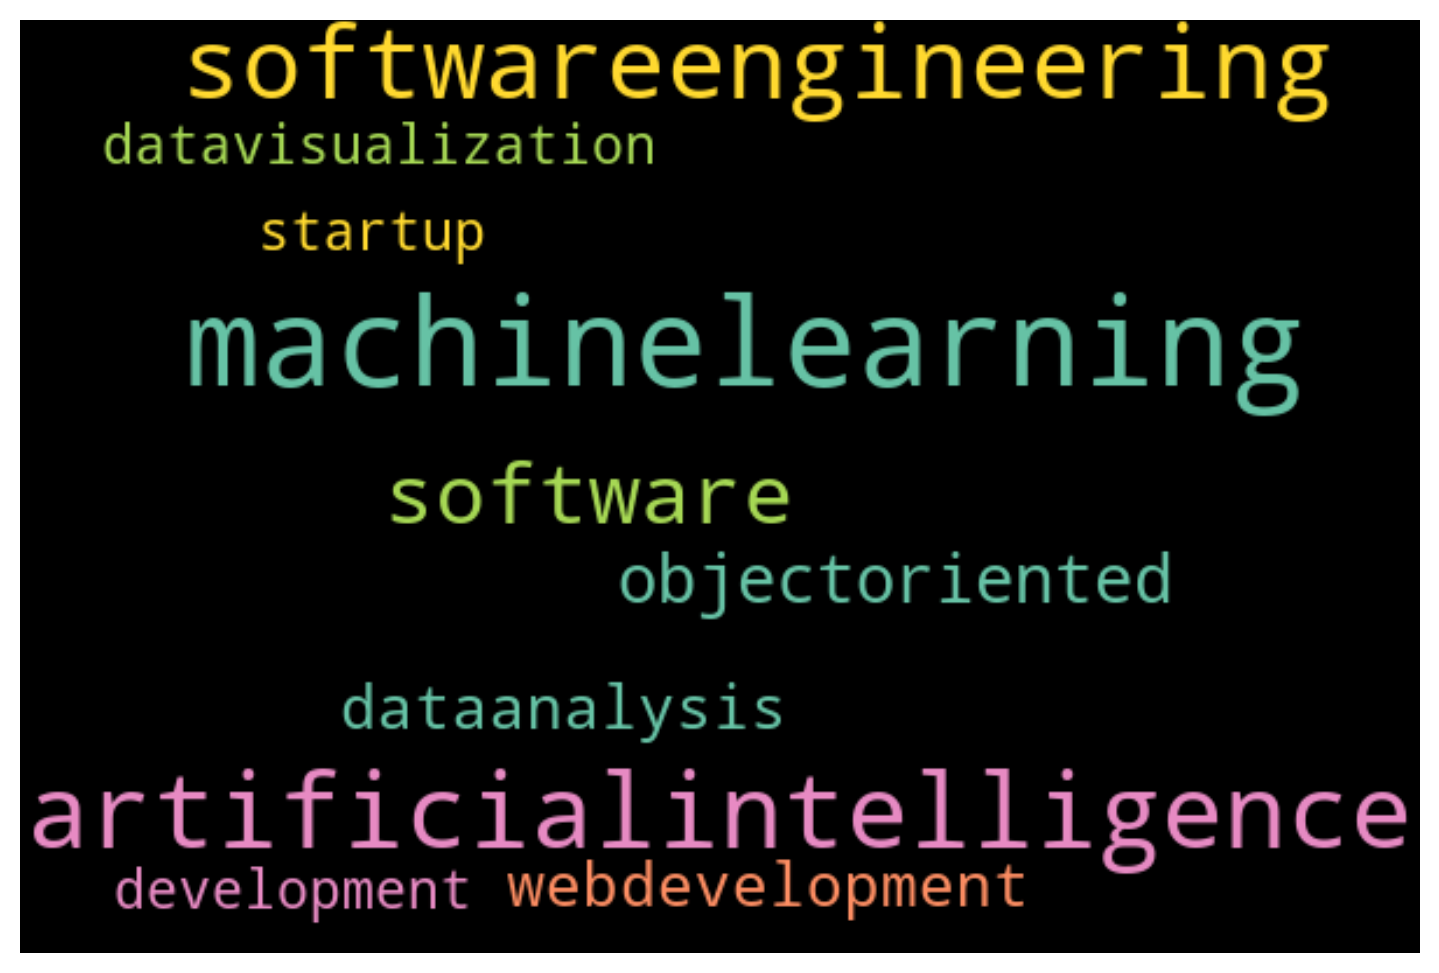

In [30]:
# Search top 10 tags appearing alongside software development tags
df_python_sd = filter_lang_posts_by_tags(df1,"python","'python'","Python","'software-development'")
tag = df_python_sd.apply(lambda row: process_text(row.Tags, ['python','datascience','data','towardsdatascience','programming','science','technology','coding','softwaredevelopment']), axis=1)  
combine_tags_python = ' '.join(tag)  
cloud = make_wordcloud(combine_tags_python)
cloud.show()

In [31]:
cnt = 0
for i in df_python_sd['Tags']:
    if "'machine-learning'" in i or "'software-engineering'" in i or "'web-development'" in i:
        cnt += 1
print("ML, software eng, and web dev appeared in" , round((cnt/len(df_python_sd)*100),0), "percent of software dev tagged articles")

ML, software eng, and web dev appeared in 18.0 percent of software dev tagged articles


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


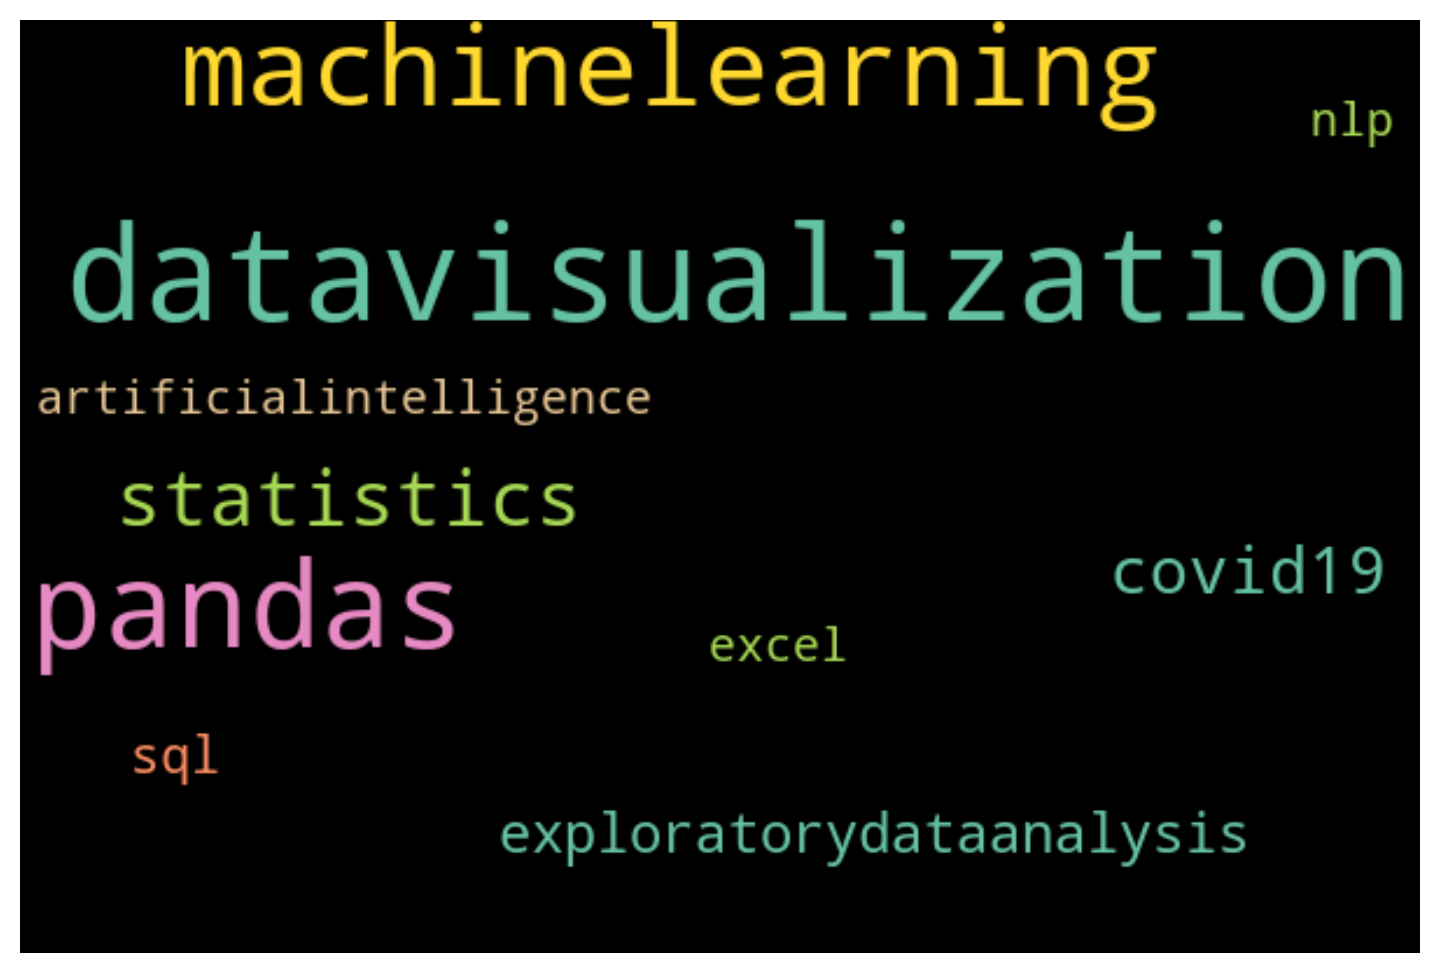

In [32]:
# Search top 10 tags appearing alongside data analysis tags
df_python = filter_posts_by_lang(df1,"python","'python'","Python")
df_python_da = filter_lang_posts_by_tags(df1,"python","'python'","Python","'data-analysis'")
tag = df_python_da.apply(lambda row: process_text(row.Tags, ['python','datascience','data','towardsdatascience','programming','science','technology','dataanalysis']), axis=1)  
combine_tags_python = ' '.join(tag)  
cloud = make_wordcloud(combine_tags_python)
cloud.show()

In [33]:
cnt = 0
for i in df_python_da['Tags']:
    if "'data-visualization'" in i:
        cnt += 1
print("data analysis appeared together with data visualization", round((cnt/len(df_python_da)*100),0), "percent of the time")

data analysis appeared together with data visualization 22.0 percent of the time


In [34]:
cnt = 0
for i in df_python_da['Tags']:
    if "'covid-19'" in i:
        cnt += 1
print("covid-19 appeared in" , round((cnt/len(df_python_da)*100),0), "percent of data analysis tagged articles")

covid-19 appeared in 5.0 percent of data analysis tagged articles


In [35]:
cnt = 0
for i in df_python_da['Tags']:
    if "'pandas'" in i:
        cnt += 1
print("pandas appeared in" , round((cnt/len(df_python_da)*100),0), "percent of data analysis tagged articles")

pandas appeared in 18.0 percent of data analysis tagged articles


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


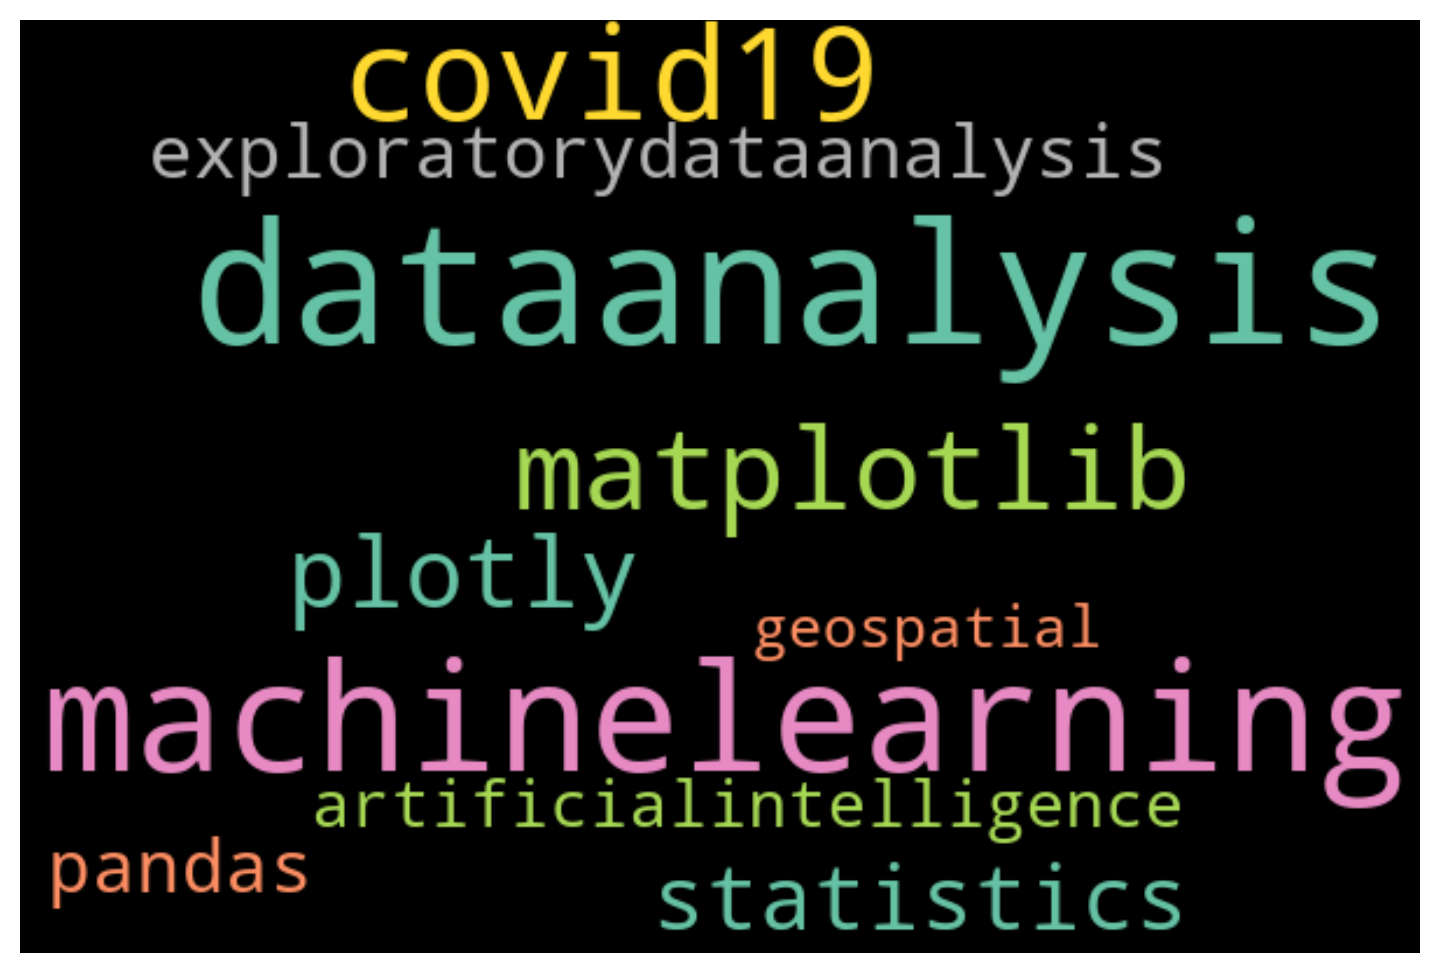

In [36]:
# Search top 10 tags appearing alongside data viz tags
df_python_viz = filter_lang_posts_by_tags(df1,"python","'python'","Python","'data-visualization'")
tag = df_python_viz.apply(lambda row: process_text(row.Tags, ['python','datascience','data','towardsdatascience','programming','science','technology','datavisualization']), axis=1)  
combine_tags_python = ' '.join(tag)  
cloud = make_wordcloud(combine_tags_python)
cloud.show()

In [37]:
cnt = 0
for i in df_python_viz['Tags']:
    if "'covid-19'" in i:
        cnt += 1
print("covid-19 appeared in" , round((cnt/len(df_python_da)*100),0), "percent of data viz tagged articles")

covid-19 appeared in 14.0 percent of data viz tagged articles


In [38]:
cnt = 0
for i in df_python_viz['Tags']:
    if "'matplotlib'" in i or "'plotly'" in i:
        cnt += 1
print("matplotlib and plotly appeared in" , round((cnt/len(df_python_da)*100),0), "percent of data viz tagged articles")

matplotlib and plotly appeared in 20.0 percent of data viz tagged articles


# R

/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


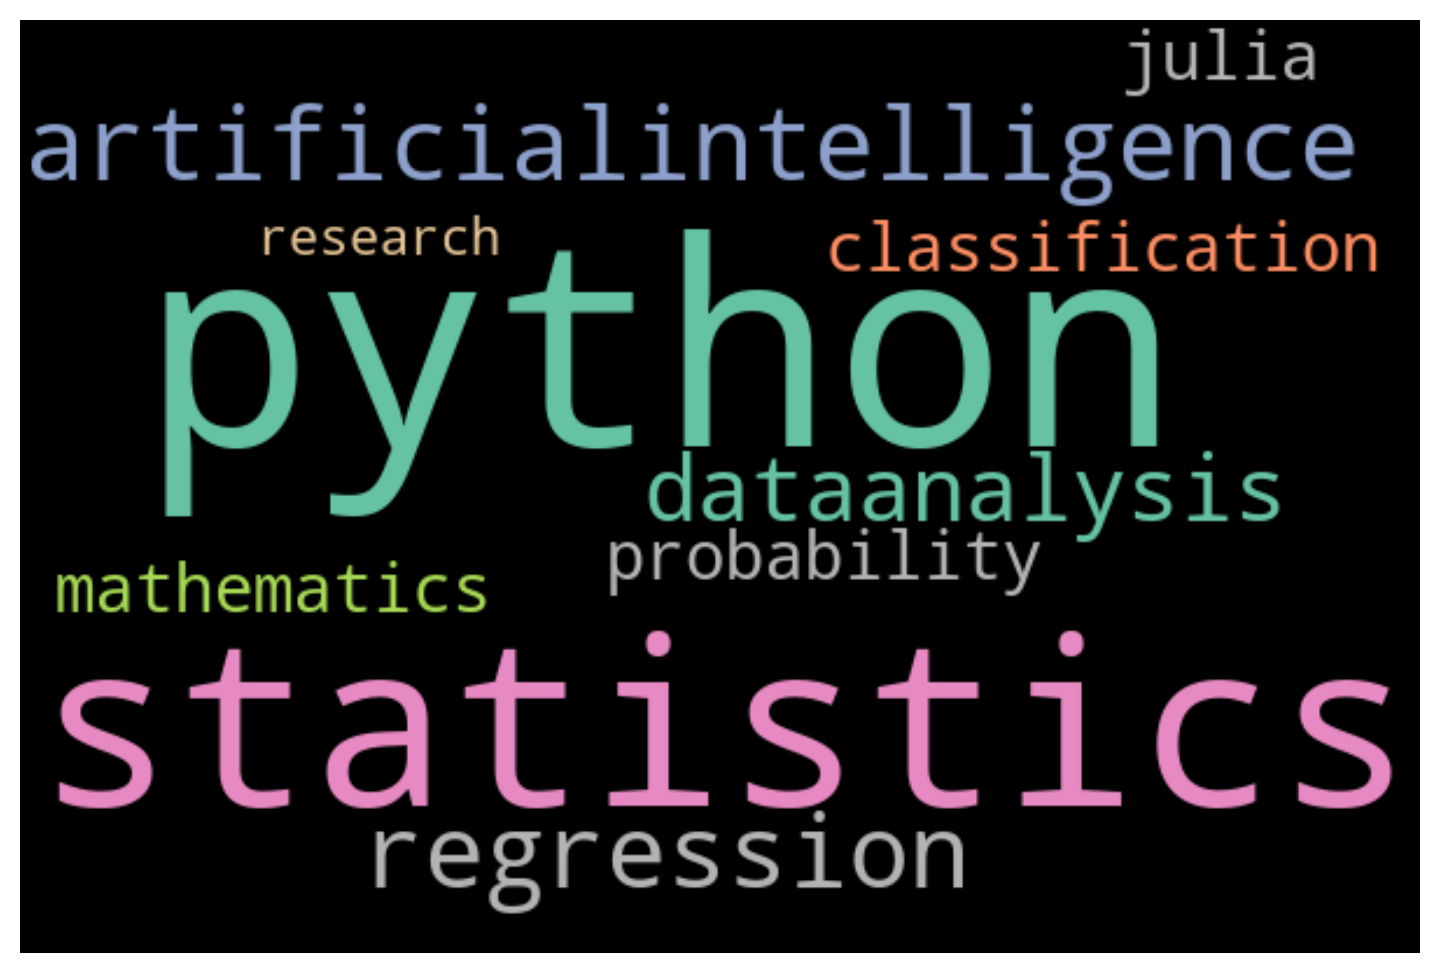

In [39]:
# Search top 10 tags appearing alongside ML tags
df_r_ml = filter_lang_posts_by_tags(df1," r ","'r'","R","'machine-learning'")
tag = df_r_ml.apply(lambda row: process_text(row.Tags, ['r','datascience','data','towardsdatascience','programming','science','machinelearning','technology']), axis=1)
combine_titles_r = ' '.join(tag) 
cloud = make_wordcloud(combine_titles_r)
cloud.show()

In [40]:
cnt = 0
for i in df_r_ml['Tags']:
    if "'python'" in i or "'statistics'" in i or "'artificial-intelligence'" in i:
        cnt += 1
print("python appeared in" , round((cnt/len(df_r_ml)*100),0), "percent of ML tagged articles")

python appeared in 50.0 percent of ML tagged articles


In [41]:
cnt = 0
for i in df_r['Tags']:
    if "'deep-learning'" in i:
        cnt += 1
print("DL appeared in" , round((cnt/len(df_r)*100),0), "percent of all R related articles")

DL appeared in 0.0 percent of all R related articles


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


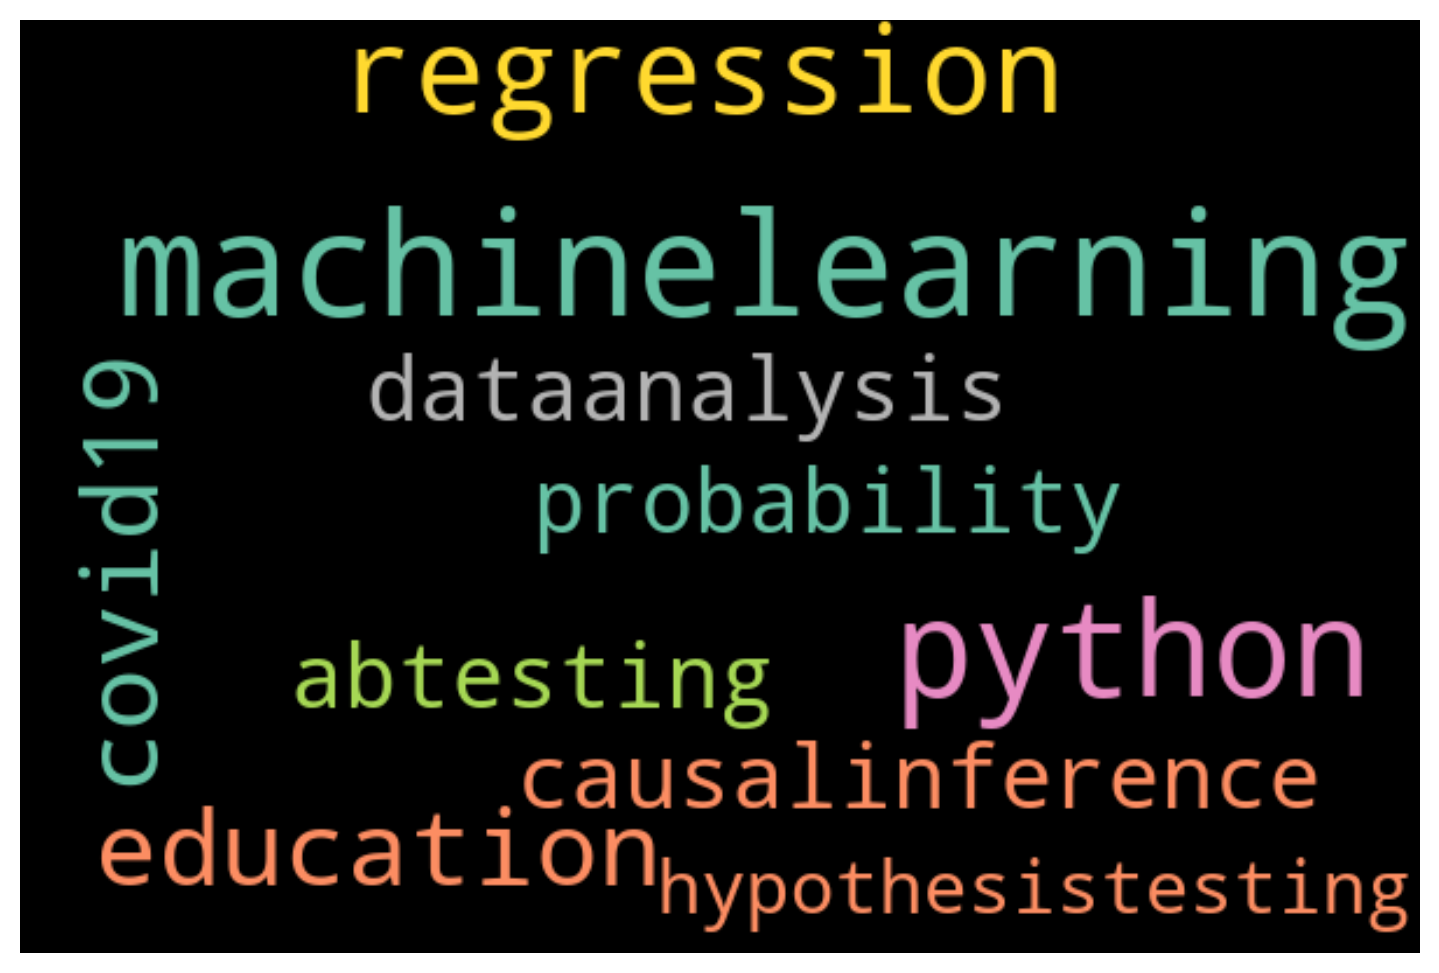

In [42]:
# Search top 10 tags appearing alongside stats tags
df_r_stats = filter_lang_posts_by_tags(df1," r ","'r'","R","'statistics'")
tag = df_r_stats.apply(lambda row: process_text(row.Tags, ['r','datascience','data','technology','towardsdatascience','programming','coding','science','statistics']), axis=1)
combine_titles_r = ' '.join(tag) 
cloud = make_wordcloud(combine_titles_r)
cloud.show()

In [43]:
cnt = 0
for i in df_r_stats['Tags']:
    if "'causal-inference'" in i or "'hypothesis-testing'" in i or "'a-b-testing'" in i or "'regression'" in i or "'probability'" in i:
        cnt += 1
print("These statistics related topics [see code] appeared in",round((cnt/len(df_r_stats)*100),0),"percent of statistics tagged articles")

These statistics related topics [see code] appeared in 29.0 percent of statistics tagged articles


Find variety of unique tags appearing per statistics post (R vs. Python)

In [44]:
# R
df_r_stats = filter_lang_posts_by_tags(df1," r ","'r'","R","'statistics'")
df_r_stats['Tags'] = df_r_stats["Tags"].str.split(", ")
tags = []
col_one_list = df_r_stats['Tags'].tolist()
for i in col_one_list:
    for j in i:
        j = j.strip("[]")
        tags.append(j)
stats_tags = len(set(tags))
stats_articles = len(df_r_stats)
print("There are", round(stats_tags/stats_articles,1),"unique tags per stats related article in R")

# Python
df_python_stats = filter_lang_posts_by_tags(df1,"python","'python'","Python","'statistics'")
df_python_stats['Tags'] = df_python_stats["Tags"].str.split(", ")
tags = []
col_one_list = df_python_stats['Tags'].tolist()
for i in col_one_list:
    for j in i:
        j = j.strip("[]")
        tags.append(j)
stats_tags = len(set(tags))
stats_articles = len(df_python_stats)
print("There are", round(stats_tags/stats_articles,1),"unique tags per stats related article in Python")

There are 1.3 unique tags per stats related article in R
There are 0.8 unique tags per stats related article in Python


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


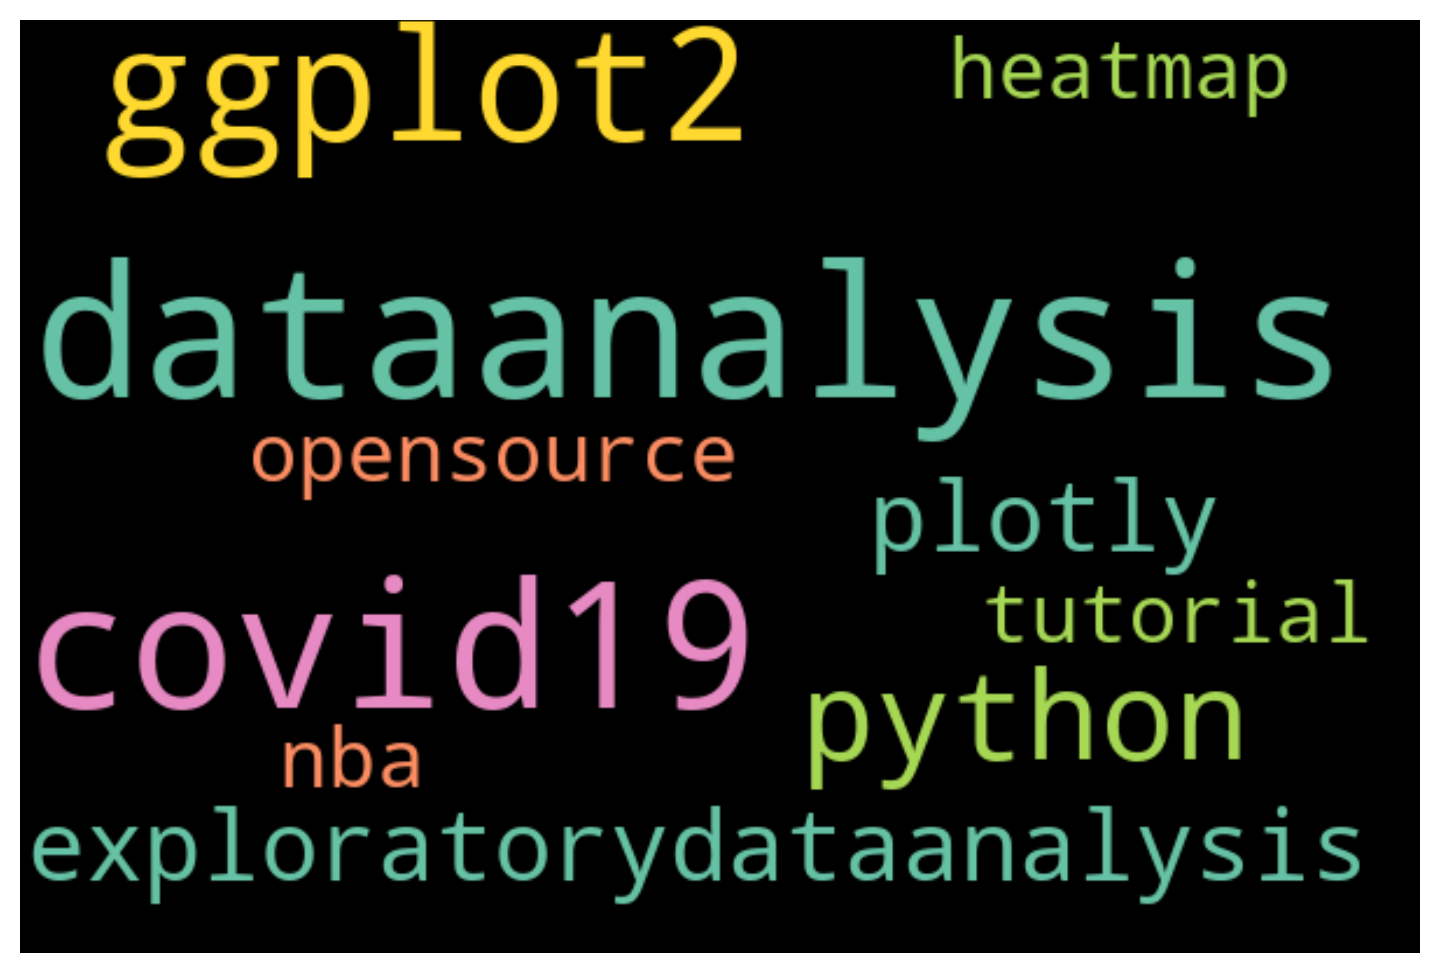

In [45]:
# Search top 10 tags appearing alongside data viz tags
df_r_viz = filter_lang_posts_by_tags(df1," r ","'r'","R","'data-visualization'")
tag = df_r_viz.apply(lambda row: process_text(row.Tags, ['r','datascience','datascienc','technology','data','towardsdatascience','programming','science','datavisualization']), axis=1)
combine_titles_r = ' '.join(tag) 
cloud = make_wordcloud(combine_titles_r)
cloud.show()

In [46]:
cnt = 0
for i in df_r_viz['Tags']:
    if "'covid-19'" in i:
        cnt += 1
print("ggplot2 appeared in", round((cnt/len(df_r_viz)*100),0),"percent of data viz tagged articles")

ggplot2 appeared in 12.0 percent of data viz tagged articles


/Users/halabanz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


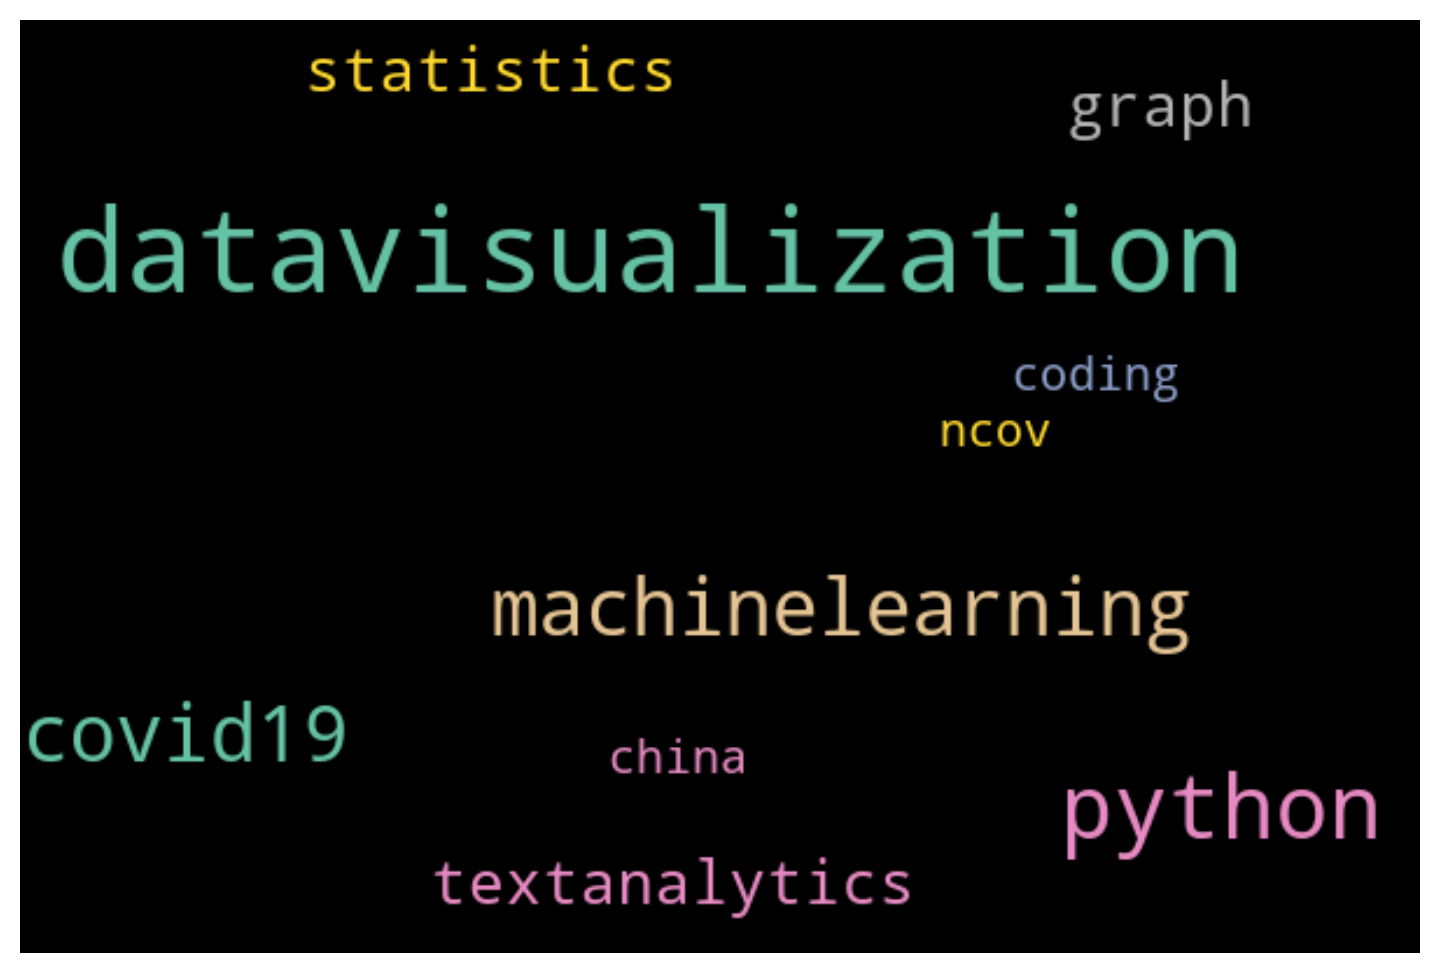

In [47]:
# Search top 10 tags appearing alongside data analysis tags
df_r_da = filter_lang_posts_by_tags(df1," r ","'r'","R","'data-analysis'")
tag = df_r_da.apply(lambda row: process_text(row.Tags, ['r','datascience','data','towardsdatascience','programming','technology','science','dataanalysis']), axis=1)
combine_titles_r = ' '.join(tag) 
cloud = make_wordcloud(combine_titles_r)
cloud.show()

In [48]:
cnt = 0
for i in df_r_da['Tags']:
    if "'covid-19'" in i:
        cnt += 1
print("covid-19 appeared in",round((cnt/len(df_r_da)*100),0),"percent of data analysis tagged articles")

covid-19 appeared in 7.0 percent of data analysis tagged articles


# Examine claps per language

In [49]:
df1['Upvotes'].describe() # data is quite skewed

count    11579.000000
mean       159.673201
std        433.445596
min          0.000000
25%         18.000000
50%         64.000000
75%        156.000000
max      14400.000000
Name: Upvotes, dtype: float64

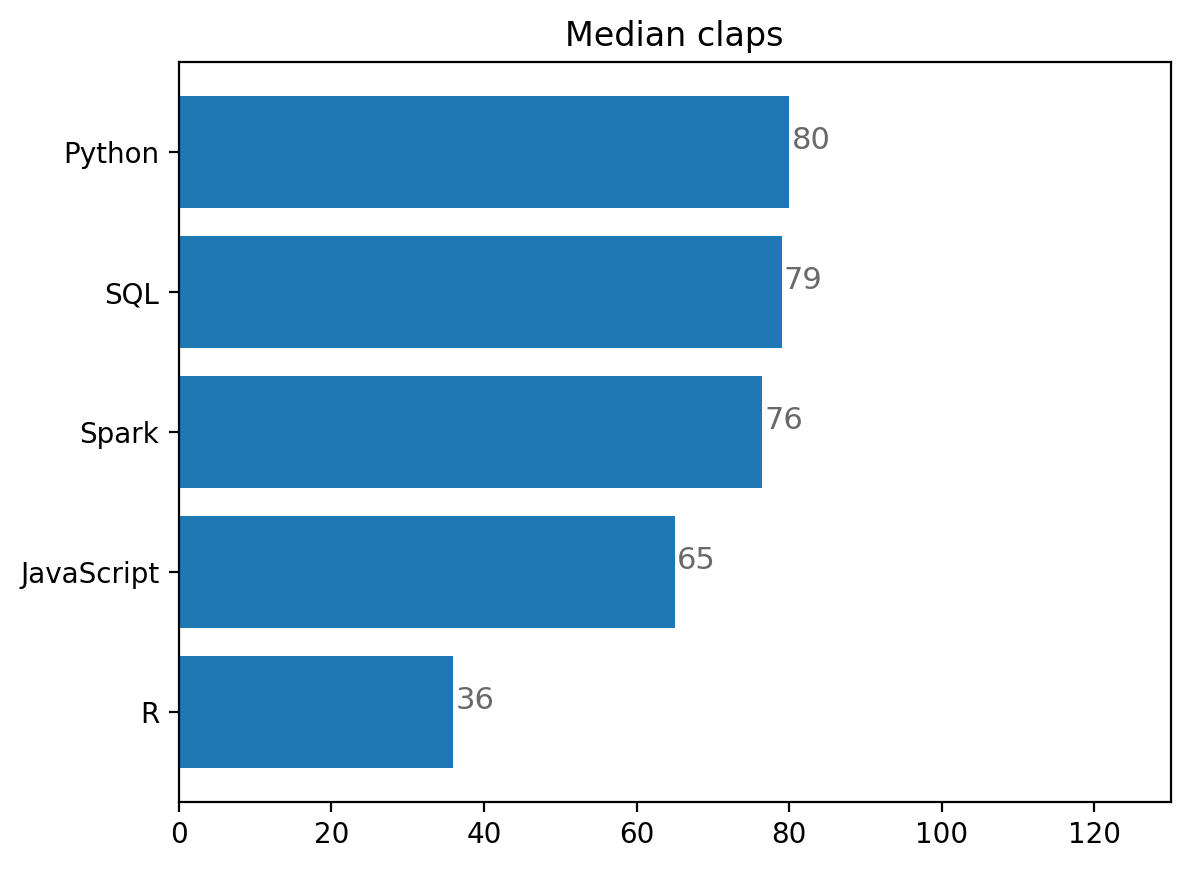

In [50]:
# Combine all
df_all = pd.concat([df_python, df_r, df_sql, df_spark, df_js], ignore_index=True) 

# find median upvotes based on language
df_upvotes = df_all.groupby('Language', as_index = False)[['Upvotes']].median().sort_values('Upvotes', ascending = False)
df_upvotes.columns = ['Language','Upvotes']

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(df_upvotes['Language'], df_upvotes['Upvotes'], align='center')

ax.set_yticks(x)
ax.set_xlim([0,130])
ax.set_yticklabels(x)
ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Median claps')
ax.set_title('Median claps')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(int(round((i.get_width()/100)*100, 1))), fontsize=11,
color='dimgrey')
    
plt.show()